<a href="https://colab.research.google.com/github/BasithMrasak/Summer-Analytics-25-IIT-Guwahati/blob/main/age_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [ ]:
train=pd.read_csv('/content/drive/MyDrive/Train_Data.csv')
test=pd.read_csv('/content/drive/MyDrive/Test_Data.csv')

In [ ]:
train.head()

,SEQN,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group
0,73564.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,Adult
1,73568.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85,Adult
2,73576.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14,Adult
3,73577.0,1.0,2.0,28.9,104.0,NaN,84.0,16.15,Adult
4,73580.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92,Adult


In [ ]:
train.tail()

,SEQN,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group
1961,83711.0,2.0,2.0,33.5,100.0,2.0,73.0,6.53,Adult
1962,83712.0,1.0,2.0,30.0,93.0,2.0,208.0,13.02,Adult
1963,83713.0,1.0,2.0,23.7,103.0,2.0,124.0,21.41,Adult
1964,83718.0,2.0,2.0,27.4,90.0,2.0,108.0,4.99,Adult
1965,83727.0,1.0,2.0,24.5,NaN,2.0,108.0,3.76,Adult


In [ ]:
train.shape

(1966, 9)

In [ ]:
train.columns

Index(['SEQN', 'RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU', 'DIQ010', 'LBXGLT',
       'LBXIN', 'age_group'],
      dtype='object')

In [ ]:
train.duplicated().sum()

np.int64(0)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1966 entries, 0 to 1965
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       1954 non-null   float64
 1   RIAGENDR   1948 non-null   float64
 2   PAQ605     1953 non-null   float64
 3   BMXBMI     1948 non-null   float64
 4   LBXGLU     1953 non-null   float64
 5   DIQ010     1948 non-null   float64
 6   LBXGLT     1955 non-null   float64
 7   LBXIN      1957 non-null   float64
 8   age_group  1952 non-null   object 
dtypes: float64(8), object(1)
memory usage: 138.4+ KB


In [ ]:
# Convert "Adult"/"Senior" to 0/1
train["age_group"] = train["age_group"].map({"Adult": 0, "Senior": 1})

In [ ]:
print(train["age_group"].value_counts())
print(train["age_group"].isna().sum())


age_group
0.0    1638
1.0     314
Name: count, dtype: int64
14


In [ ]:
train.isnull().sum()

,0
SEQN,12
RIAGENDR,18
PAQ605,13
BMXBMI,18
LBXGLU,13
DIQ010,18
LBXGLT,11
LBXIN,9
age_group,14


In [ ]:
[features for features in train.columns if train[features].isnull().sum()>0]

['SEQN',
 'RIAGENDR',
 'PAQ605',
 'BMXBMI',
 'LBXGLU',
 'DIQ010',
 'LBXGLT',
 'LBXIN',
 'age_group']

In [ ]:
from sklearn.impute import SimpleImputer

# Drop rows with no target label
train = train.dropna(subset=["age_group"])

# Separate X and y
X = train.drop("age_group", axis=1)
y = train["age_group"]

# Median imputation
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)  # For training features
X = pd.DataFrame(X_imputed, columns=X.columns)

In [ ]:
train

,SEQN,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group
0,73564.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,0.0
1,73568.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85,0.0
2,73576.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14,0.0
3,73577.0,1.0,2.0,28.9,104.0,NaN,84.0,16.15,0.0
4,73580.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92,0.0
...,...,...,...,...,...,...,...,...,...
1961,83711.0,2.0,2.0,33.5,100.0,2.0,73.0,6.53,0.0
1962,83712.0,1.0,2.0,30.0,93.0,2.0,208.0,13.02,0.0
1963,83713.0,1.0,2.0,23.7,103.0,2.0,124.0,21.41,0.0
1964,83718.0,2.0,2.0,27.4,90.0,2.0,108.0,4.99,0.0


In [ ]:
X.isnull().sum()

,0
SEQN,0
RIAGENDR,0
PAQ605,0
BMXBMI,0
LBXGLU,0
DIQ010,0
LBXGLT,0
LBXIN,0


In [ ]:
X["age_group"] = y  # Temporarily add target back to compute correlation
corr_matrix = X.corr()
print(corr_matrix)

               SEQN  RIAGENDR    PAQ605    BMXBMI    LBXGLU    DIQ010  \
SEQN       1.000000 -0.003626 -0.021463 -0.069711 -0.039078  0.020736   
RIAGENDR  -0.003626  1.000000  0.151043  0.059637 -0.144480 -0.024328   
PAQ605    -0.021463  0.151043  1.000000 -0.045392 -0.007634  0.015180   
BMXBMI    -0.069711  0.059637 -0.045392  1.000000  0.212751  0.054711   
LBXGLU    -0.039078 -0.144480 -0.007634  0.212751  1.000000 -0.052920   
DIQ010     0.020736 -0.024328  0.015180  0.054711 -0.052920  1.000000   
LBXGLT    -0.007276  0.017261  0.061355  0.180519  0.666301 -0.015292   
LBXIN     -0.045399 -0.024206  0.014294  0.543977  0.231774  0.071088   
age_group  0.023531 -0.057155 -0.024929 -0.022807  0.035914 -0.021282   

             LBXGLT     LBXIN  age_group  
SEQN      -0.007276 -0.045399   0.023531  
RIAGENDR   0.017261 -0.024206  -0.057155  
PAQ605     0.061355  0.014294  -0.024929  
BMXBMI     0.180519  0.543977  -0.022807  
LBXGLU     0.666301  0.231774   0.035914  
DIQ010    -

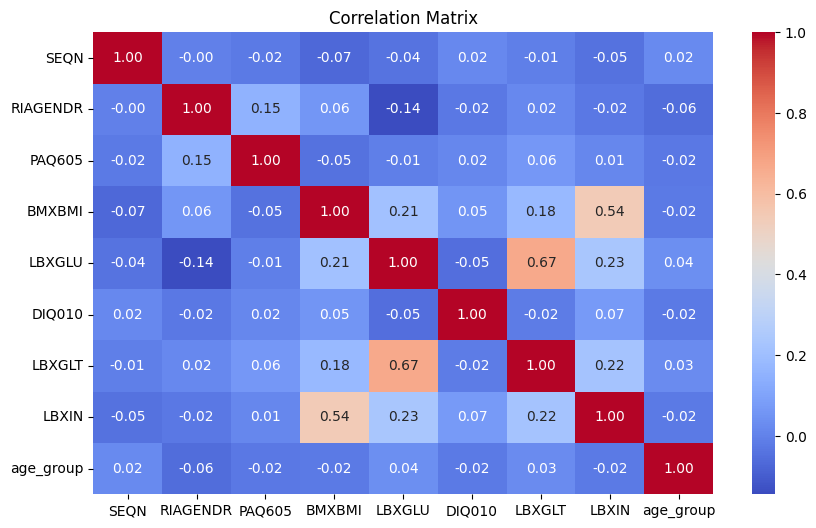

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
if "age_group" in X.columns:
  X.drop(columns=["age_group"], inplace=True)

In [ ]:
#feature engineering
X["GLU_per_GLT"] = X["LBXGLU"] / (X["LBXGLT"] + 1)     # To avoid divide-by-zero
X["BMI_times_INS"] = X["BMXBMI"] * X["LBXIN"]
test["GLU_per_GLT"] = test["LBXGLU"] / (test["LBXGLT"] + 1)
test["BMI_times_INS"] = test["BMXBMI"] * test["LBXIN"]

In [ ]:

X["BMI_squared"] = X["BMXBMI"] ** 2
test["BMI_squared"] = test["BMXBMI"] ** 2


In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     "n_estimators": [100, 200],
#     "max_depth": [6, 10, 14],
#     "min_samples_split": [2, 5, 10],
#     "min_samples_leaf": [1, 3],
#     "class_weight": ["balanced"]
# }


In [ ]:
# rf = RandomForestClassifier(random_state=42)

# grid_search = GridSearchCV(
#     estimator=rf,
#     param_grid=param_grid,
#     scoring='f1',
#     cv=5,
#     n_jobs=-1,
#     verbose=1
# )

# grid_search.fit(X_imputed, y)
# print("Best F1 Score:", grid_search.best_score_)
# print("Best Parameters:", grid_search.best_params_)


In [ ]:
# Keep only common columns for training and test
test = test[X.columns]

imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)
test_imputed = imputer.transform(test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=200,
    max_depth=6,
    min_samples_split=10,
    min_samples_leaf=3,
    class_weight='balanced',
    random_state=42
)

model.fit(X_imputed, y)

RandomForestClassifier(class_weight='balanced', max_depth=6, min_samples_leaf=3,
                       min_samples_split=10, n_estimators=200, random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score

# Use macro F1 score (equal weight to both classes)
f1 = make_scorer(f1_score)

scores = cross_val_score(model, X_imputed, y, cv=5, scoring=f1)
print("Cross-Validated F1 Scores:", scores)
print("Average F1 Score:", scores.mean())


Cross-Validated F1 Scores: [0.34343434 0.43113772 0.4        0.38993711 0.3625731 ]
Average F1 Score: 0.3854164548637371


In [ ]:
y_pred = model.predict(test_imputed)
print(y_pred)

[0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1.
 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1.]


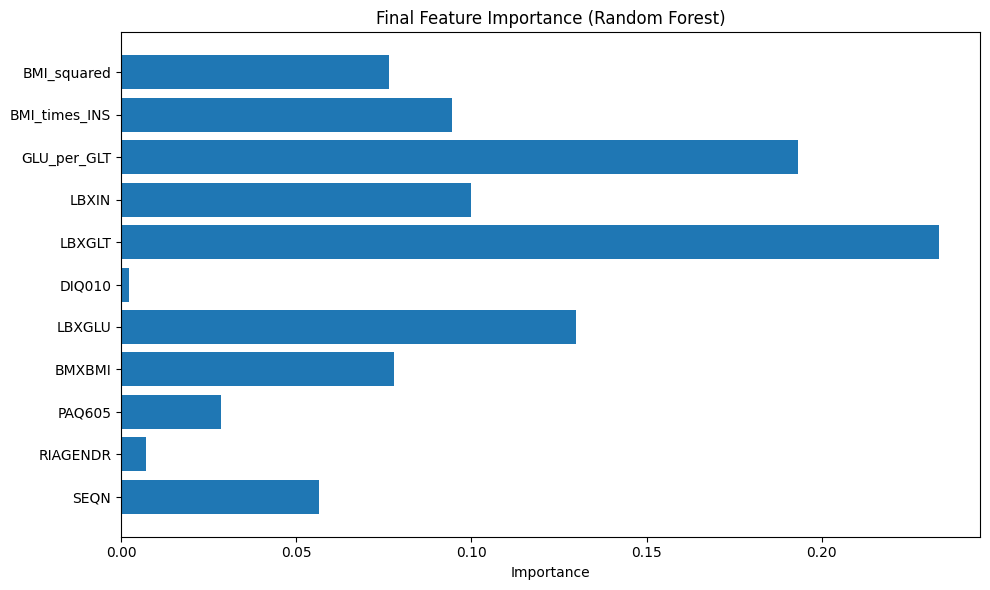

In [ ]:
import matplotlib.pyplot as plt

feature_names = X.columns
importances = model.feature_importances_

plt.figure(figsize=(10,6))
plt.barh(feature_names, importances)
plt.title("Final Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


In [ ]:
# Submit
submission = pd.DataFrame({"age_group": y_pred.astype(int)})
submission.to_csv("submission.csv", index=False)


In [ ]:
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(test_imputed)
# print(y_pred)
# submission = pd.DataFrame({"age_group": y_pred.astype(int)})
# submission.to_csv("submission.csv", index=False)
